<a href="https://colab.research.google.com/github/Christelleelkhoury/AAI614_-ElKhoury-/blob/main/Outlier_Detection_With_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://www.kaggle.com/code/melikedilekci/diabetes-dataset-for-beginners/input

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


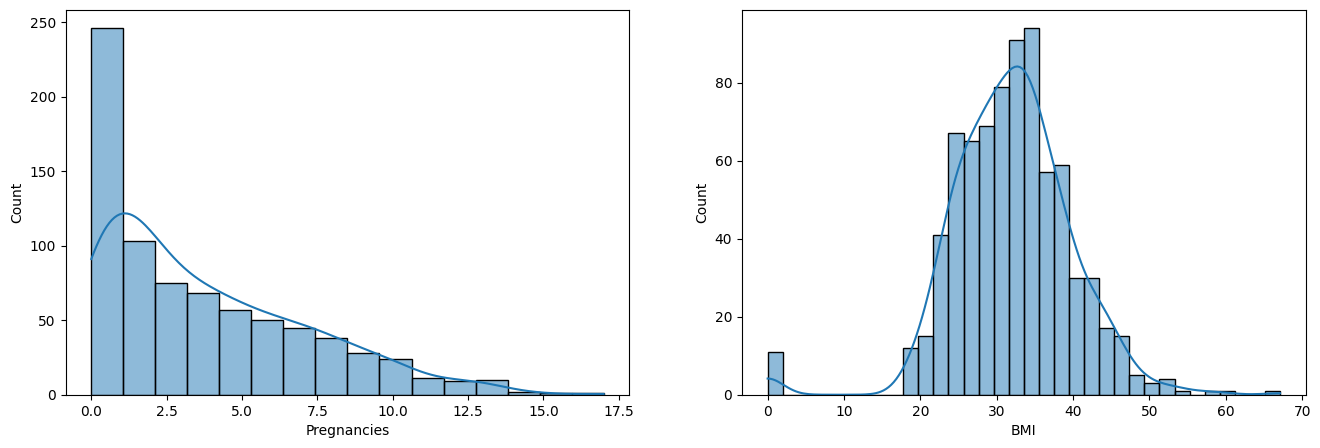

In [30]:
#example
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['Pregnancies'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['BMI'], kde=True)

plt.show()

From the above graph,we see that the pregnancies column is right skewed. So I will do the outlier detection and analysis on this column only.

In [31]:
df['Pregnancies'].describe()

,Pregnancies
count,768.000000
mean,3.845052
std,3.369578
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,17.000000


<Axes: ylabel='Pregnancies'>

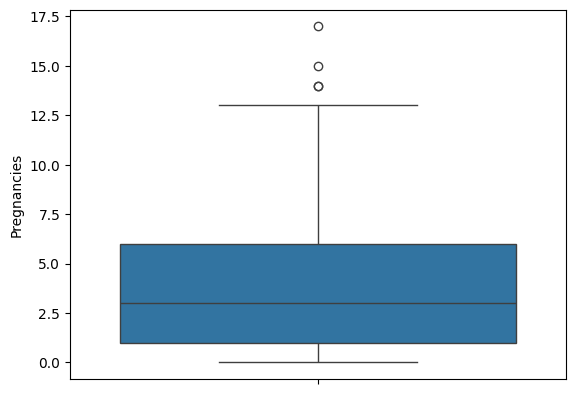

In [32]:
sns.boxplot(data = df['Pregnancies'])

I used a boxplot to identify outliers in the column with a skewed distribution, aiming to address them using the IQR method. The plot indicates the presence of outliers in the upper range, while none are observed in the lower range.

##Finding the IQR

In [35]:
percentile25 = df['Pregnancies'].quantile(0.25)
percentile75 = df['Pregnancies'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  6.0
25th quartile:  1.0


In [37]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  5.0


In [38]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 13.5
Lower limit -6.5


##Finding Outliers

In [39]:
df[df['Pregnancies'] > upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [40]:
df[df['Pregnancies'] > upper_limit].count()

,0
Pregnancies,4
Glucose,4
BloodPressure,4
SkinThickness,4
Insulin,4
BMI,4
DiabetesPedigreeFunction,4
Age,4
Outcome,4


##Trimming

In [41]:
new_df = df[df['Pregnancies'] < upper_limit]
new_df.shape

(764, 9)

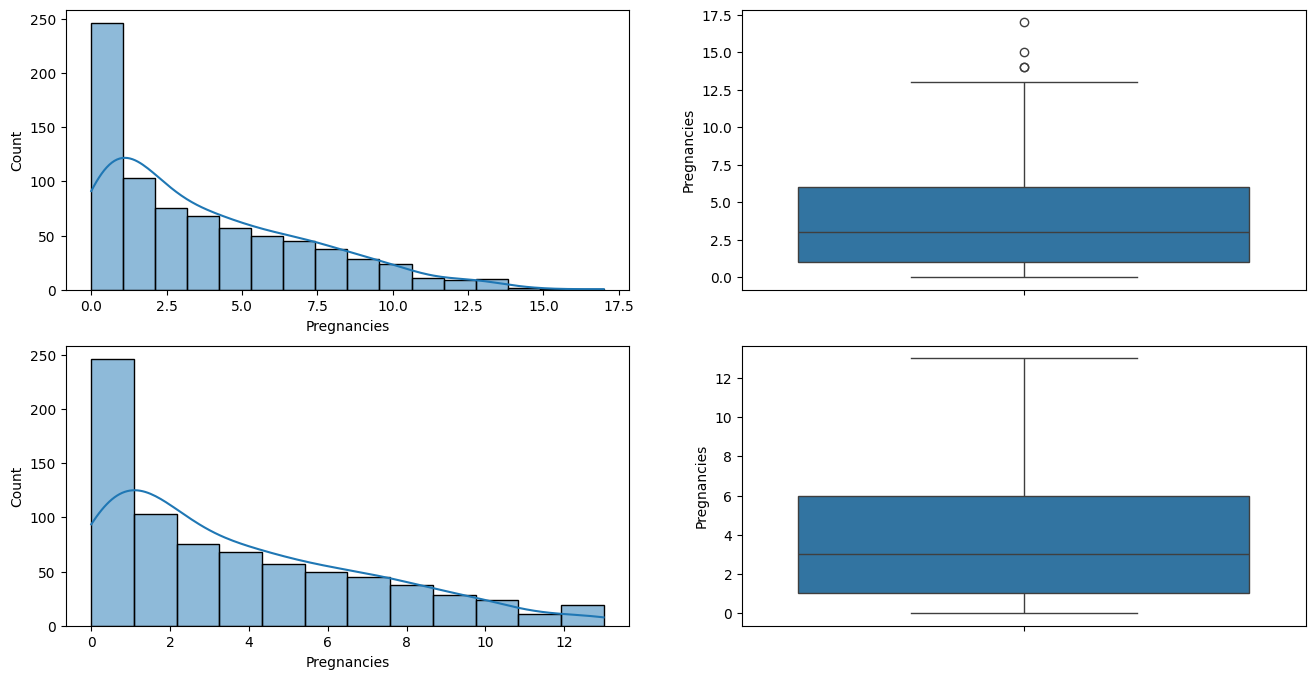

In [42]:
#comparing df and new_df

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Pregnancies'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = df['Pregnancies'])

plt.subplot(2,2,3)
sns.histplot(new_df['Pregnancies'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_df['Pregnancies'])

plt.show()

The main plot, which lets us know whether the outlier is removed or not, is a boxplot. We can see that the outliers are removed.